In [1]:
%pylab inline
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from scipy.stats import gaussian_kde
from pydoc import help
from scipy.stats.stats import pearsonr
from sklearn.metrics import explained_variance_score
from scipy.stats import wilcoxon
import warnings
warnings.filterwarnings('ignore')
from __future__ import print_function, division

Populating the interactive namespace from numpy and matplotlib


In [2]:
h99 = pd.read_csv('./h99_10m/s2_10m_h99_predicted_observed_n24.csv', header=0)
print (list(h99))
h99.columns=['Unnamed: 0','pr_h99', 'ob_h99']
print (list(h99))

['Unnamed: 0', 'predicted', 'observed']
['Unnamed: 0', 'pr_h99', 'ob_h99']


In [3]:
h95 = pd.read_csv('./h95_10m/s2_10m_h95_predicted_observed.csv', header=0)
print (list(h95))
h95.columns=['Unnamed: 0','pr_h95', 'ob_h95']
print (list(h95))

['Unnamed: 0', 'predicted', 'observed']
['Unnamed: 0', 'pr_h95', 'ob_h95']


In [5]:
h75 = pd.read_csv('./h75_10m/s2_10m_h75_predicted_observed.csv', header=0)
print (list(h75))
h75.columns=['Unnamed: 0','pr_h75', 'ob_h75']
print (list(h75))

['Unnamed: 0', 'predicted', 'observed']
['Unnamed: 0', 'pr_h75', 'ob_h75']


In [6]:
h25 = pd.read_csv('./h25_10m/s2_10m_h25_predicted_observed.csv', header=0)
print (list(h25))
h25.columns=['Unnamed: 0','pr_h25', 'ob_h25']
print (list(h25))

['Unnamed: 0', 'predicted', 'observed']
['Unnamed: 0', 'pr_h25', 'ob_h25']


In [8]:
hmc = pd.read_csv('./mch_10m/s2_10m_mch_predicted_observed.csv', header=0)
print (list(hmc))
hmc.columns=['Unnamed: 0','pr_hmc', 'ob_hmc']
print (list(hmc))

['Unnamed: 0', 'predicted', 'observed']
['Unnamed: 0', 'pr_hmc', 'ob_hmc']


In [11]:
hsd = pd.read_csv('./h_std_10m/s2_10m_hsd_predicted_observed.csv', header=0)
print (list(hsd))
hsd.columns=['Unnamed: 0','pr_hsd', 'ob_hsd']
print (list(hsd))

['Unnamed: 0', 'predicted', 'observed']
['Unnamed: 0', 'pr_hsd', 'ob_hsd']


In [12]:
hcv = pd.read_csv('./h_cov_10m/s2_10m_hcv_predicted_observed.csv', header=0)
print (list(hcv))
hcv.columns=['Unnamed: 0','pr_hcv', 'ob_hcv']
print (list(hcv))

['Unnamed: 0', 'predicted', 'observed']
['Unnamed: 0', 'pr_hcv', 'ob_hcv']


In [13]:
ndf = pd.concat([h99,h95,h75,h25,hmc, hsd, hcv], axis=1)
ndf.to_csv()

In [15]:
ndf2=ndf[['ob_h99','ob_h95','ob_h75','ob_h25','ob_hmc','ob_hsd','ob_hcv','pr_h99','pr_h95','pr_h75','pr_h25',
          'pr_hmc','pr_hsd','pr_hcv',]]
print (ndf2.shape)

(37000, 14)


In [16]:
summary = ndf2.describe()

In [17]:
ndf2.to_csv('s2_10m_validation01_results.csv')

In [18]:
summary.to_csv('summary_s2_10m_validation01_results.csv')

In [19]:
%pylab inline

import pandas as pd
import math
import numpy as np
from random import sample
import matplotlib.pyplot as plt
import csv
import glob
import os

Populating the interactive namespace from numpy and matplotlib


In [34]:
print (list(ndf))

['Unnamed: 0', 'pr_h99', 'ob_h99', 'Unnamed: 0', 'pr_h95', 'ob_h95', 'Unnamed: 0', 'pr_h75', 'ob_h75', 'Unnamed: 0', 'pr_h25', 'ob_h25', 'Unnamed: 0', 'pr_hmc', 'ob_hmc', 'Unnamed: 0', 'pr_hsd', 'ob_hsd', 'Unnamed: 0', 'pr_hcv', 'ob_hcv']


In [40]:
data2 = ndf2[['pr_h99', 'ob_h99','pr_h95', 'ob_h95', 'pr_h75', 'ob_h75', 'pr_h25', 'ob_h25','pr_hmc', 'ob_hmc','pr_hsd', 'ob_hsd', 'pr_hcv', 'ob_hcv' ]]
data2.to_csv('s2_10_val01_summaryStats_for_boxPlots.csv')

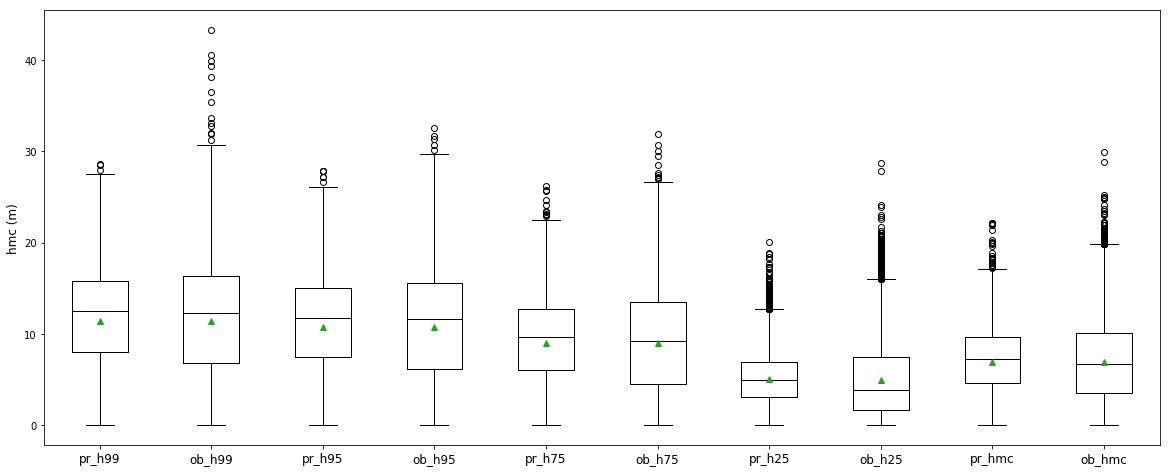

In [38]:
meanprop = dict(color='k')
patch_artist=True
# set color and plot the box plot 
color =  dict(boxes='black', whiskers='black', medians='black', caps='black')
barplot = data2.plot(kind='box',color=color, showmeans=True,figsize=(20,8),meanprops=meanprop) # , 

# axis font size
values = ['pr_h99', 'ob_h99','pr_h95', 'ob_h95', 'pr_h75', 'ob_h75', 'pr_h25', 'ob_h25','pr_hmc', 'ob_hmc',]
barplot.set_xticklabels(values,fontsize=12)

# need to comment out the y label values when first creating the plot to see what the range of values are for the r2Vals string
#r2Vals = ['2.8','3.0', '3.2','3.4','3.6','3.8','4.0','4.2', '4.4']
#barplot.set_yticklabels(r2Vals,fontsize=22)

# axis labels 
barplot.set_ylabel("hmc (m)",fontsize = 12)
#barplot.set_xlabel('Summary stats_predicted and Observed',fontsize = 22)

# export the figure to as png at 600 dpi
fig = barplot.get_figure()

fig.savefig('bar_graph_n_estimatorsRMSE.png',dpi=600)

In [29]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from scipy.stats import gaussian_kde
from pydoc import help
from scipy.stats.stats import pearsonr
from scipy.stats import itemfreq
from sklearn.metrics import explained_variance_score
from scipy.stats import wilcoxon
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


37000


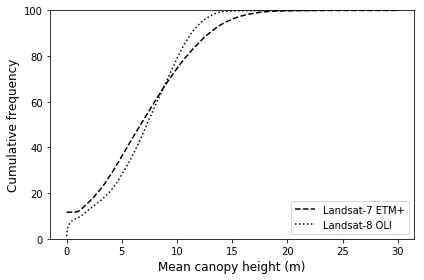

In [31]:
l7chm = ndf2['ob_hmc'].values
maxVal = l7chm.max()
result = itemfreq(l7chm)
    
nS = str(len(l7chm))
print (nS)

df1 = pd.DataFrame(result, columns = ['MEAN_chmL7', 'Count'])
SumC = df1['Count'].sum()
df1['percCount'] = (df1['Count']/SumC)*100
df1['cumuPerc'] = df1.percCount.cumsum()
x1 = df1['MEAN_chmL7']
y1 = df1['cumuPerc']


l8chm = ndf2['pr_hmc'].values
maxVal2 = l8chm.max()
result2 = itemfreq(l8chm)

df2 = pd.DataFrame(result2, columns = ['MEAN_chmL8', 'Count'])
SumC2 = df2['Count'].sum()
df2['percCount'] = (df2['Count']/SumC2)*100
df2['cumuPerc'] = df2.percCount.cumsum()
x2 = df2['MEAN_chmL8']
y2 = df2['cumuPerc']


# text for the x and y axis
    
#plt.title("2013" , fontsize=12)
plt.ylabel('Cumulative frequency',fontsize=12)
plt.xlabel('Mean canopy height (m)',fontsize=12)
 
    
plt.ylim(0, 100)

plt.plot(x1, y1, color='black', linestyle="--",linewidth=1.5 ,label='Landsat-7 ETM+')
plt.plot(x2, y2, color='black', linestyle=':',linewidth=1.5 ,label='Landsat-8 OLI' )
    
plt.legend(loc=4)
    
plt.tight_layout()
plt.savefig('l7-l8_106068_2013_cumu_freq_dist.pdf',figsize=(15,15),dpi=600)
plt.show()